<a href="https://colab.research.google.com/github/WandersonClayton/data_analysis/blob/main/projeto_rh_mudan_a_de_emprego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#F24405">Analise de dados RH - Mudança de emprego</font>
<hr color="#0CABA8" size="1">


**Por: [Wanderson Clayton](https://www.linkedin.com/in/wandersonclayton3/)**

<span>
  <a href="https://api.whatsapp.com/send?phone=5534998771247">
    <img src="https://img.icons8.com/material-outlined/24/000000/whatsapp.png"/>
  </a>
  <a href="https://www.linkedin.com/in/wandersonclayton3">
    <img src="https://img.icons8.com/material-outlined/24/000000/linkedin.png"/>
  </a>
  <a href="https://github.com/WandersonClayton">
    <img src="https://img.icons8.com/material-outlined/24/000000/github.png"/>
  </a>
</span>

<hr color="#F5F5F5" size="2"> 

Este notebook tem como objetico realizar a analise de dados para prever melhor quais os fatores mais influenciam um candidato a vaga, permanecer na empresa ou buscar novos empregos.

<div style="display:inline-block;vertical-align:top;">
<h2>Sumário:</h2>
<ul>
    <li><a href="#contexto-projeto">1. Sobre o contexto do projeto </a></li>
    <li><a href="#install-pack">2. Instalação e carregamento de pacotes </a></li>
    <li><a href="#conhecendo_dados">3. Carregando e conhecendo dados </a></li>  
    <li><a href="#explorando_dados">4. Análise Exploratória de dados</a></li>
    <li><a href="#limpeza_dados">5. Identificação de valores ausentes e limpesa de dados </a></li>
    <li><a href="#reaferindo_analise">6. Verificando se a limpeza de dados alterou o dataset </a></li>
    <li><a href="#relatorio">7. Relatório</a></li>
</ul>
</div>

<a id='contexto-projeto'></a>
# <font color="#FA7F08">1. Sobre o Contexto do Projeto</font>
<hr color="#F5F5F5" size="1">

### <font color="#22BABB">Realizar analise afim de identificar quais os fatores influencia um candidato mudar ou não de emprego.</font>

Uma empresa que atua em Big Data e Data Science deseja contratar cientistas de dados entre as pessoas que foram aprovadas em alguns cursos ministrados pela empresa. Muitas pessoas se inscrevem para o treinamento. A empresa quer saber qual desses candidatos realmente quer trabalhar para a empresa após o treinamento ou procurando um novo emprego, pois ajuda a reduzir o custo e o tempo, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos. Informações relacionadas a dados demográficos, educação e experiência estão em mãos desde a inscrição e inscrição dos candidatos.

Este conjunto de dados foi projetado para entender os fatores que levam uma pessoa a deixar o emprego atual também para pesquisas de RH. Pelo(s) modelo(s) que usam as credenciais atuais, dados demográficos e dados de experiência, você preverá a probabilidade de um candidato procurar um novo emprego ou trabalhar para a empresa, bem como interpretar os fatores afetados na decisão do funcionário.

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">📌 Os principais objetivos na aprendizagem deste projeto: </div></strong> <br>
<div style="color: rgb(0, 0, 0);">→ Realizar limpeza e tratamento de dados; </div>
<div style="color: rgb(0, 0, 0);">→ Realizar análise exploratória;</div>
<div style="color: rgb(0, 0, 0);">→ Realizar novamente limpeza de dados apos o conhecimento e analise exploratória; e</div>
<div style="color: rgb(0, 0, 0);">→ Desenvolver relatório com pontos importantes para os tomadores de decisões.</div>
</div>

<a id='descricao-variaveis'></a>
### <font color="#F24405"> Descrição das Variáveis do Dataset</font>
<hr color="#F5F5F5" size="1">

| Variável | Descrição |
| --- | --- |
| **enrollee_id** | Identificador único para cada candidato |
| **city** | Código da cidade |
| **city_development_index** | Índice de desenvolvimento da cidade (escalado) |
| **gender** | Gênero do candidato |
| **relevent_experience** | Experiência relevante do candidato |
| **enrolled_university** | Tipo de curso universitário matriculado, se houver |
| **education_level** | Nível de educação do candidato |
| **major_discipline** | Disciplina principal de educação do candidato |
| **experience** | Experiência total do candidato em anos |
| **company_size** | Número de funcionários na empresa atual do candidato |
| **company_type** | Tipo de empresa atual do candidato |
| **lastnewjob** | Diferença em anos entre o trabalho anterior e o trabalho atual |
| **training_hours** | Horas de treinamento concluídas |
| **target** | 0 - Não procurando mudar de emprego, 1 - Procurando mudar de  emprego |

<a id='install-pack'></a>
# <font color="#FA7F08"> 2. Instalação e carregamento de pacotes </font>
<hr color="#F5F5F5" size="1">

In [9]:
#!pip install -q -U watermark

In [10]:
#Pack para manipular dados
import numpy as np 
import pandas as pd 

#Pack para visulização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
#import category_encoders as ce

#Pck para ignorar Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
print('import de pack - ok!')



import de pack - ok!


In [11]:
# Versões dos pacotes usados neste notebook
%reload_ext watermark
%watermark -a "Wanderson Clayton - @wandersonclayton3" --iversions

Author: Wanderson Clayton - @wandersonclayton3

sys       : 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas    : 1.5.3
numpy     : 1.22.4
matplotlib: 3.7.1
scipy     : 1.10.1
seaborn   : 0.12.2
plotly    : 5.13.1
missingno : 0.5.2




    
<a id='conhecendo_dados'></a>
# <font color="#FA7F08"> 3. Carregando e conhecendo dados </font>
<hr color="#F5F5F5" size="1">

In [12]:
# Carrega o dataset
df = pd.read_csv("/content/aug_train.csv")

In [13]:
print('Numero de linhas: '+ str(df.shape[0])+'\nNúmero de colunas: '+ str(df.shape[1]))

Numero de linhas: 19158
Número de colunas: 14


In [14]:
#Nomes das colunas do dataframe
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [15]:
#Amostra de dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [16]:
# informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

  
<a id='explorando_dados'></a>
# <font color="#FA7F08"> 4. Análise Exploratória de dados </font>
<hr color="#F5F5F5" size="1">

In [17]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Ao se fazer uma pequena analise nos dados notamos que podemos classificar as colunas em categóricas e númericas, sendo elas:
* Categoricas              
 1.   city                     
 3.   gender                   
 4.   relevent_experience
 5.   enrolled_university
 6.   education_level
 7.   major_discipline
 9.   company_size
 10.  company_type
 11.  last_new_job
 13.  target
<br>
* Númericas
 2.   city_development_index
 8.   experience
 12.  training_hours 
 

    
### <font color="#FA7F08"> 4.1. Verificando a distribuição de variaveis categoricas </font>
<hr color="#F5F5F5" size="1">
    

In [18]:

df.describe(include = object).drop(columns = ['experience'])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,13220,13018,18735
unique,123,3,2,3,5,6,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3083,9817,8040


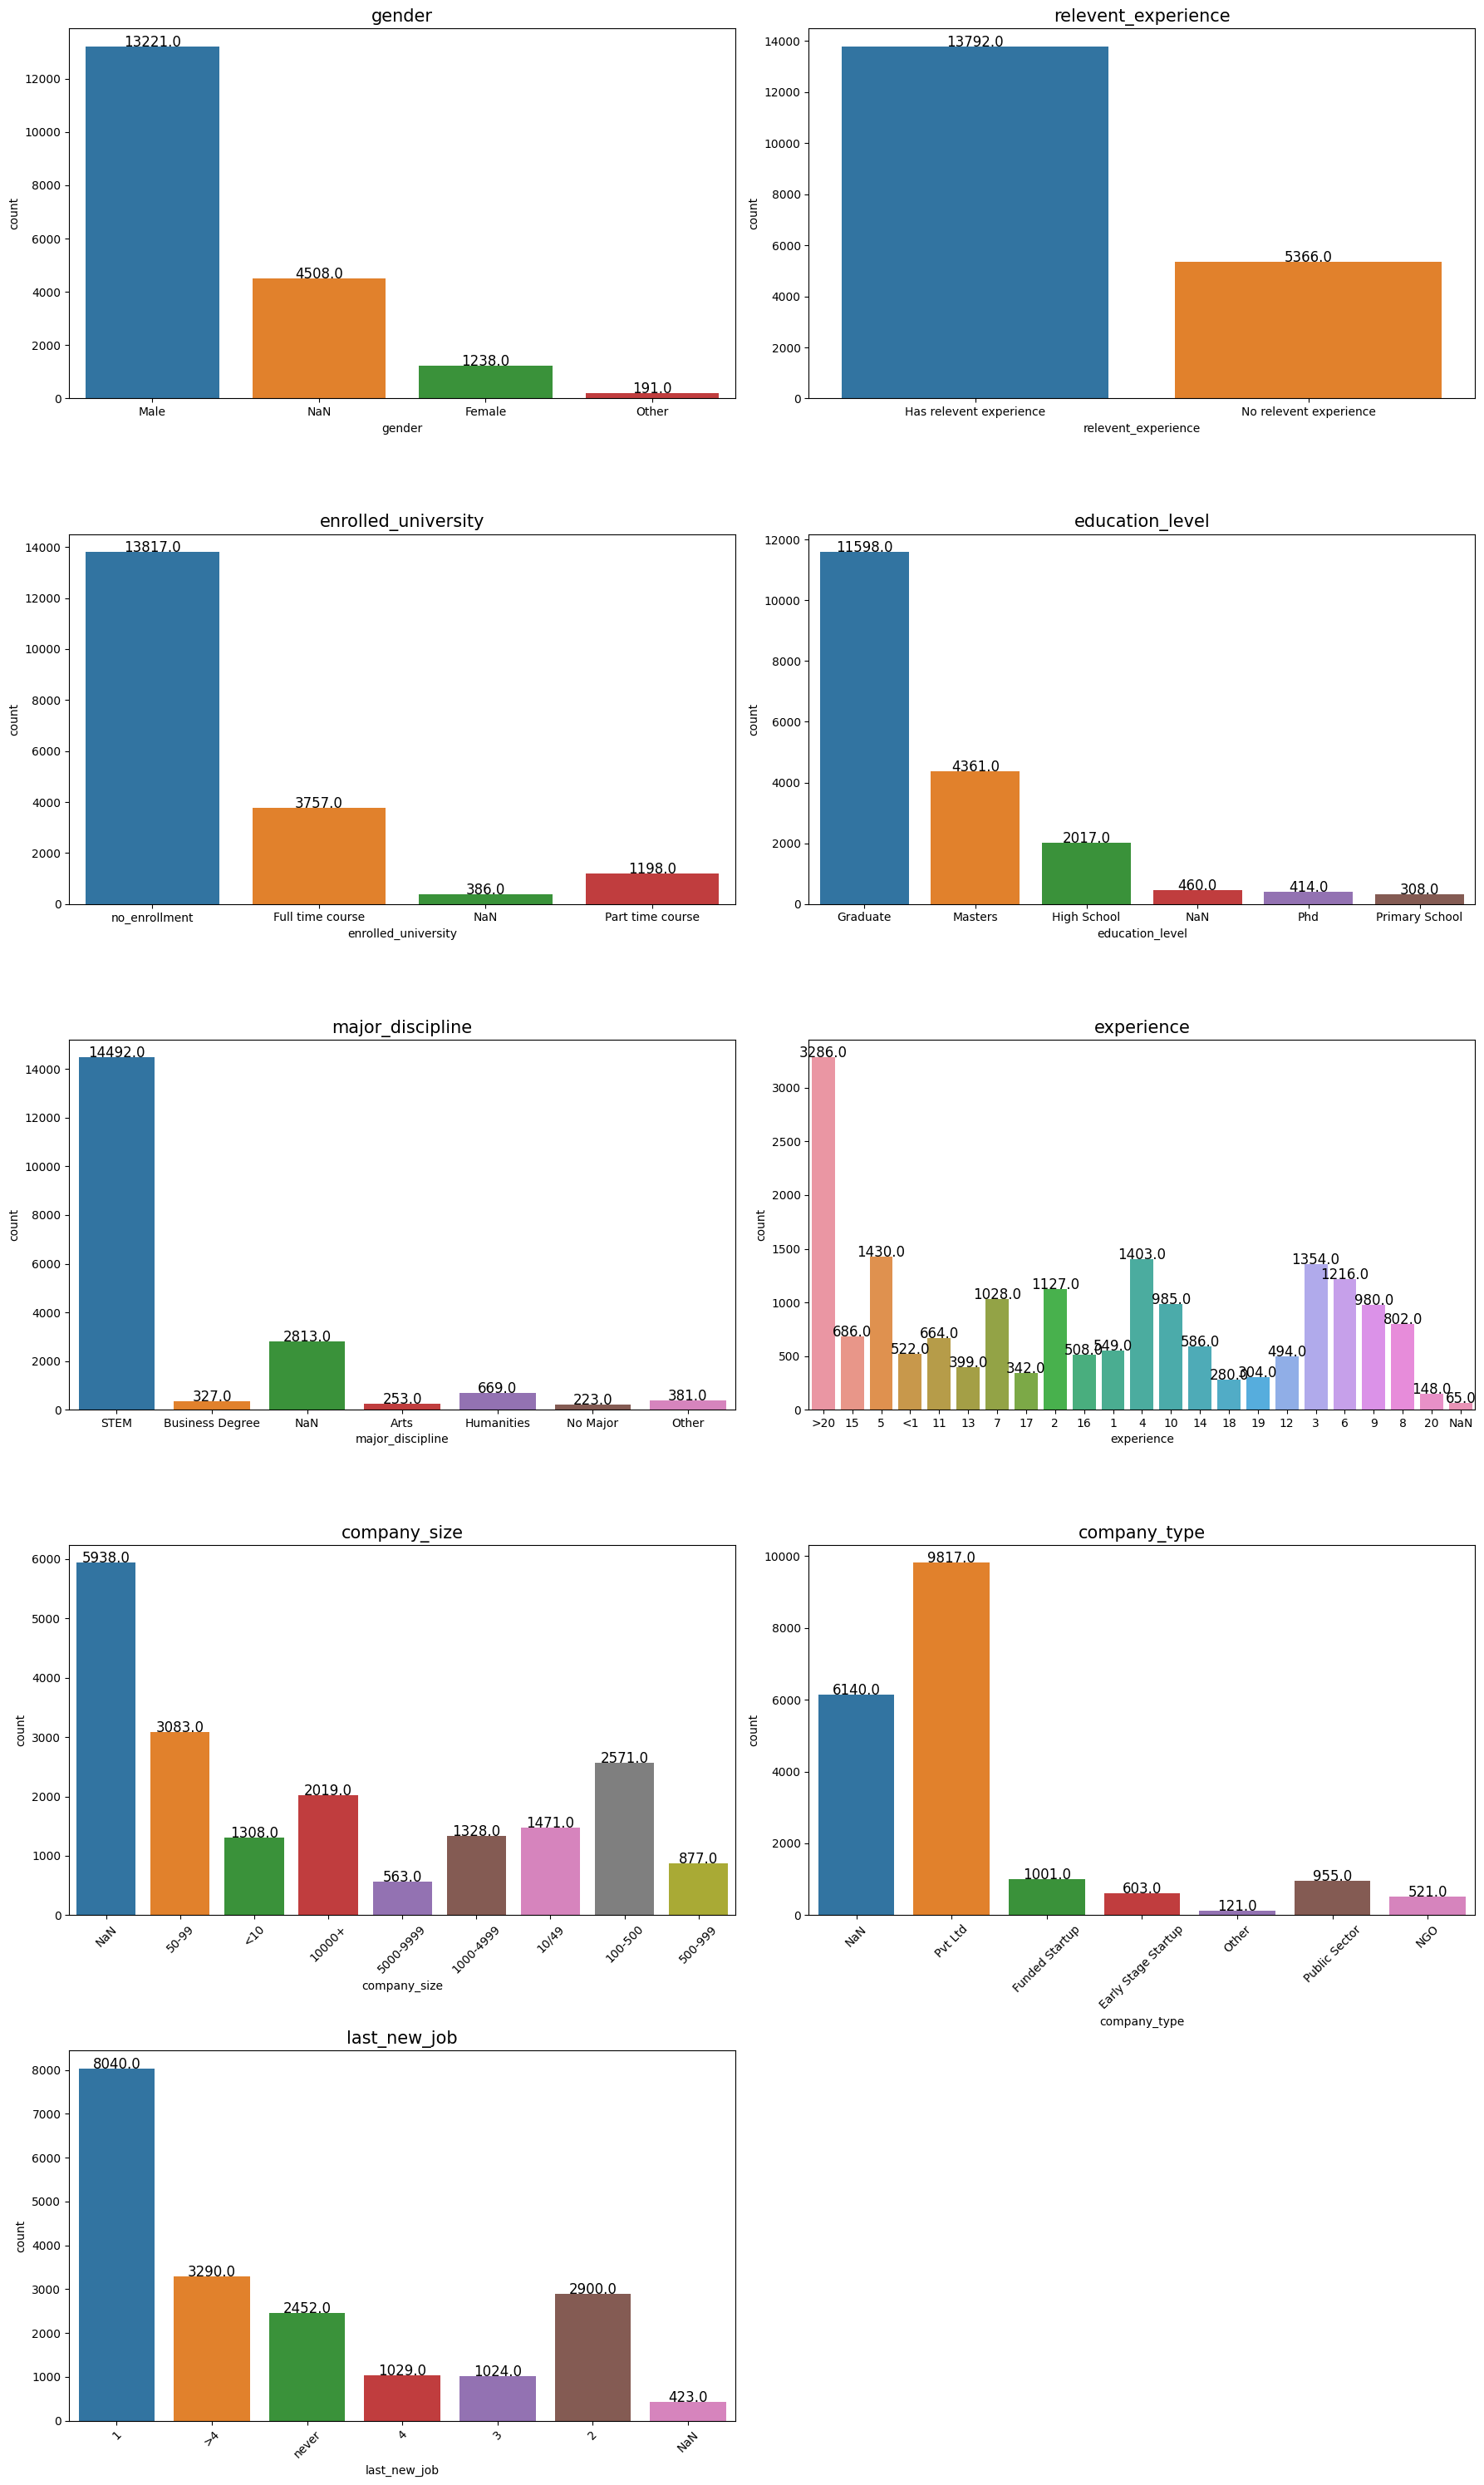

In [19]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)



### <font color="#FA7F08"> 4.2 Verificando a distribuição de variaveis numericas</font>
<hr color="#F5F5F5" size="1">
    
* Para descrever as colunas numericas primeiro precisamos transformar a coluna 'experience'para o tipo numerico.
* Plotando histograma das variaveis numericas para verificar possiveis outlier, além de distribuição visual do dados

In [20]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [21]:
replace_dict = {'>20': 21, '<1': 1, 'nan': 0}
df['experience'] = df['experience'].replace(replace_dict)
df['experience'] = df['experience'].astype('float64')


In [22]:
#Descrevendo somente os dados númericos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,experience,training_hours
count,19158.000000,19093.000000,19158.000000
mean,0.828848,10.127481,65.366896
std,0.123362,6.738127,60.058462
min,0.448000,1.000000,1.000000
25%,0.740000,4.000000,23.000000
50%,0.903000,9.000000,47.000000
75%,0.920000,16.000000,88.000000
max,0.949000,21.000000,336.000000


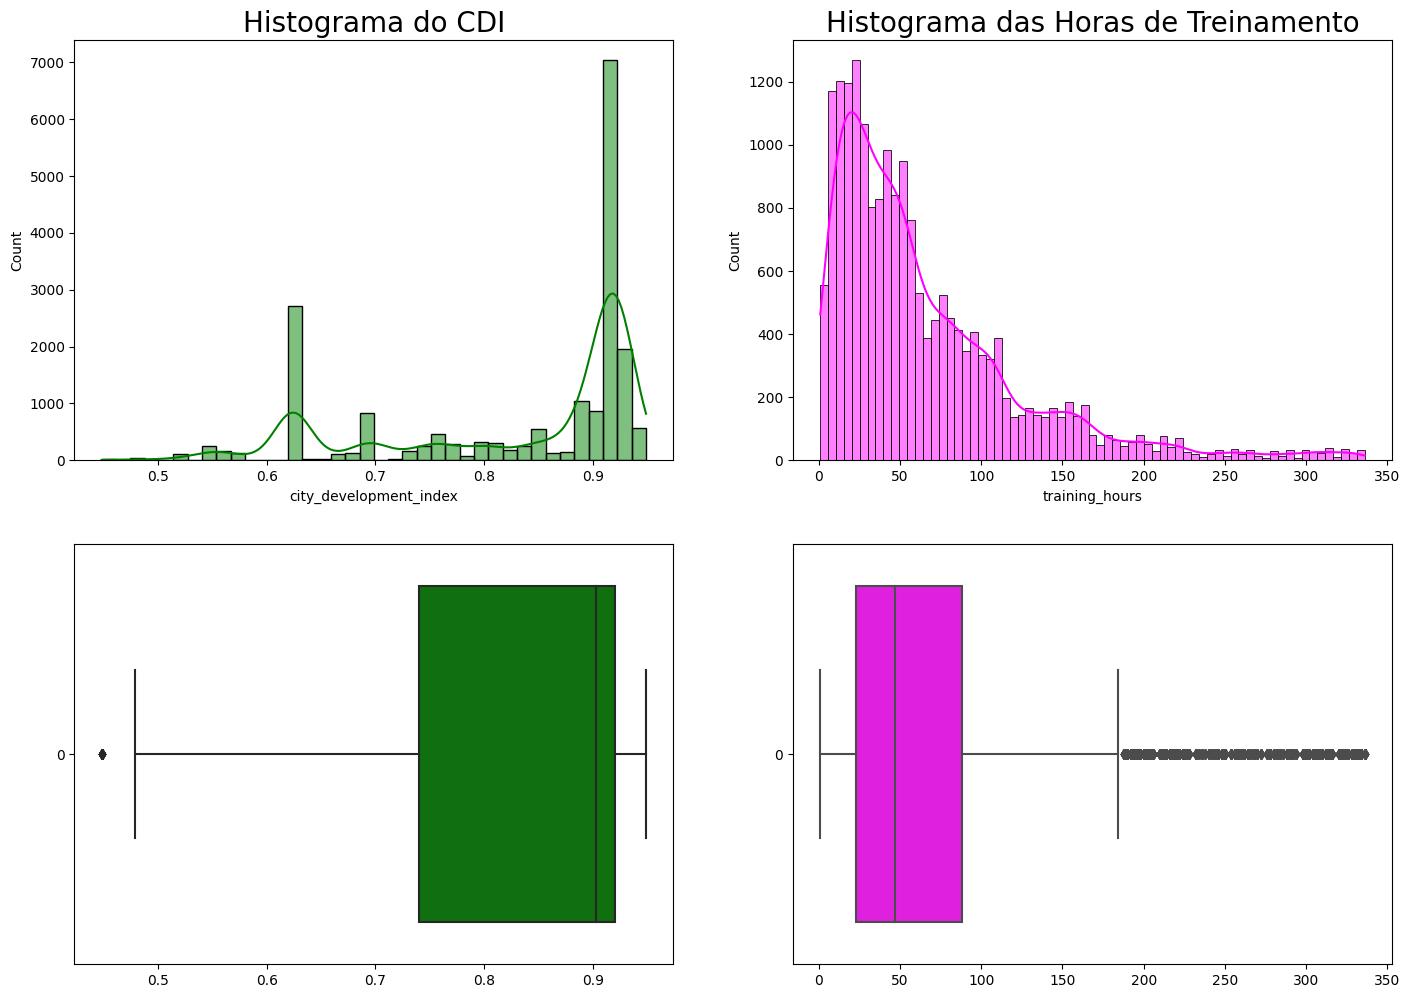

In [23]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'],orient='h', color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'],orient='h', color = "magenta")

plt.show()

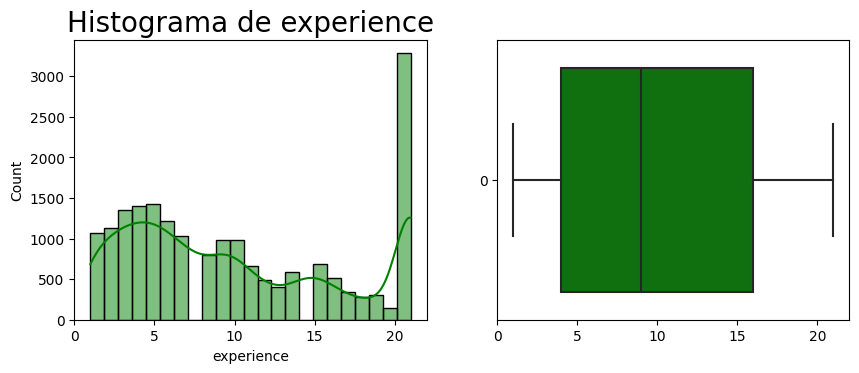

In [24]:
# Figura
plt.figure(figsize = (10,8))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['experience'], kde = True, color = "green")
plt.title('Histograma de experience', fontsize = 20)

# Subplots com boxplots
plt.subplot(222)
sns.boxplot(df['experience'],orient='h', color = "green")



plt.show()





In [25]:
# Realizar o teste de normalidade de D'Agostino-Pearson para cada coluna
for coluna in ['city_development_index', 'experience', 'training_hours']:
    stat, p_valor = normaltest(df[coluna].dropna())
    print(f'Coluna {coluna}:')
    print(f'Estatística de teste: {stat:.4f}')
    if p_valor < 0.05:
        print('Os dados não seguem uma distribuição normal.\n')
    else:
        print('Os dados seguem uma distribuição normal.\n')

Coluna city_development_index:
Estatística de teste: 2704.1481
Os dados não seguem uma distribuição normal.

Coluna experience:
Estatística de teste: 15033.6291
Os dados não seguem uma distribuição normal.

Coluna training_hours:
Estatística de teste: 6757.1650
Os dados não seguem uma distribuição normal.



<div class="alert alert-success"> 
    <strong><div style="color: rgb(0, 0, 0);"><strong>Prévia até o momento de analise exploratória:</strong></div></strong> <br>
     <div style="color: rgb(0, 0, 0);">→ ✔️ Nenhuma das 3 colunas numericas <strong><i>city_development_index, experience,training_hours </i></strong> segue uma distribuição normal ou gaussiana, logo teremos que usa de outros métodos para analisar, bem como métodos paramétricos.</div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Sobre <strong><i>training_hours</i></strong>,ao se deectar uma calda mais longa em direção a valores mais altos, e sabendo que esses valores se distancial da média, podemos inferir que algumas possias que realizam o demoram muito tempo ou nem conseguem terminar em um tempo comum. Entre possiveis causas: Expectativas frustada sobre conteudo do curso por exemplo.</div>
</div>




    
### <font color="#FA7F08"> 4.3 Verificando a correlação entre os dados</font>
<hr color="#F5F5F5" size="1">

In [26]:
df_numerical = df.copy()
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0


In [27]:
df_numerical['experience'].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [28]:
df_numerical['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [29]:
df_numerical['city'] = df['city'].str.replace('city_', '')
df_numerical['city'].value_counts()

103    4355
21     2702
16     1533
114    1336
160     845
       ... 
129       3
111       3
121       3
140       1
171       1
Name: city, Length: 123, dtype: int64

In [30]:
df_numerical["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [31]:
# Convertemos a variável last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)
df_numerical["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [32]:
df_numerical["education_level"].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [33]:
conversion_dict = {
    'Primary School': 0,
    'High School': 1,
    'Graduate': 2,
    'Masters': 3,
    'Phd': 4
}

# aplicar conversão na coluna 'education_level'
df_numerical['education_level'] = df_numerical['education_level'].map(conversion_dict)
df_numerical["education_level"].value_counts()

2.0    11598
3.0     4361
1.0     2017
4.0      414
0.0      308
Name: education_level, dtype: int64

In [34]:
df_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(5), int64(2), object(7)
mem

In [35]:
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

<ipython-input-35-dd4fc8787dc4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_numerical.drop("enrollee_id", axis = 1).corr("spearman")


,city_development_index,education_level,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.010795,0.300997,0.182698,0.007491,-0.279165
education_level,0.010795,1.000000,0.274915,0.211561,-0.014751,-0.017768
experience,0.300997,0.274915,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.211561,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,-0.014751,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.017768,-0.183721,-0.082045,-0.014126,1.000000


<ipython-input-36-f7a3357322d9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")


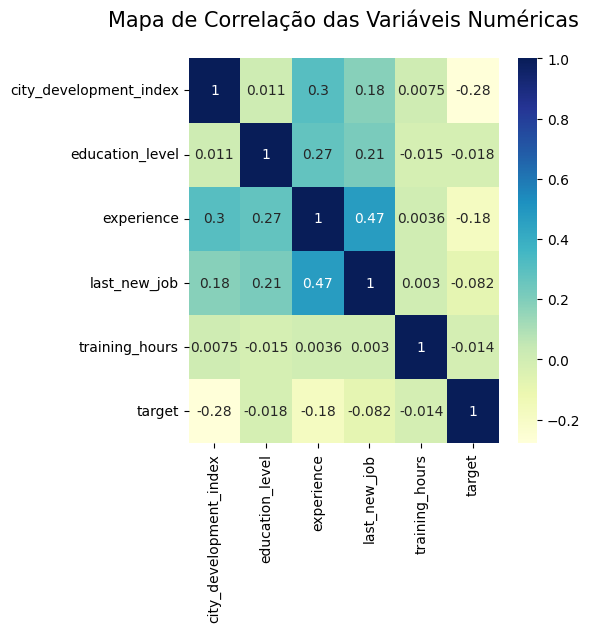

In [36]:
# Heatmap
plt.figure(figsize = (5,5))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

<div class="alert alert-success"> 
    <strong><div style="color: rgb(0, 0, 0);"><strong>Ponto a se observar com a correlação de variaveis númericas:</strong></div></strong> <br>
     <div style="color: rgb(0, 0, 0);">→ ✔️ A coluna "city_development_index" apresenta uma correlação negativa moderada com a variável alvo "target", o que sugere que quanto menor o índice de desenvolvimento da cidade, maior é a probabilidade do candidato estar buscando uma mudança de emprego.</div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ A coluna "experience" também apresenta uma correlação negativa moderada com a variável alvo "target", o que sugere que quanto menor a experiência do candidato, maior é a probabilidade de ele estar buscando uma mudança de emprego.</div>
     <div style="color: rgb(0, 0, 0);">→ ✔️ A coluna "last_new_job" apresenta uma correlação negativa fraca com a variável alvo "target", o que sugere que quanto maior o tempo desde a última mudança de emprego, menor é a probabilidade do candidato estar buscando uma mudança de emprego.</div>
     <div style="color: rgb(0, 0, 0);">→ ✔️ As colunas "education_level" e "enrolled_university" não apresentam uma correlação forte com a variável alvo "target", o que sugere que a educação e o tipo de curso universitário matriculado não são fatores determinantes para a decisão de mudar de emprego.</div>
     <div style="color: rgb(0, 0, 0);">→ ✔️  As demais colunas apresentam uma correlação fraca ou nula com a variável alvo "target"</div>
</div>


In [37]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 1000x1200 with 0 Axes>

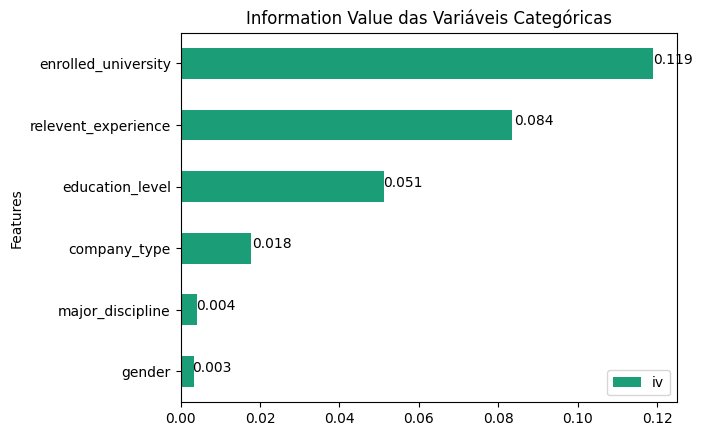

In [38]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Dark2")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

<div class="alert alert-success"> 
    <strong><div style="color: rgb(0, 0, 0);"><strong>Ponto a se observar com a correlação de variaveis categóricas:</strong></div></strong> <br>
     <div style="color: rgb(0, 0, 0);">→ ✔️ Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.</div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ A maioria dos candidatos não está matriculada em nenhum curso universitário atualmente (enrolled_university = "no_enrollment")</div>
     <div style="color: rgb(0, 0, 0);">→ ✔️ Os candidatos com experiência relevante (relevent_experience = "Has relevent experience") têm uma proporção maior de estar procurando emprego em comparação com aqueles sem experiência relevante.</div>
     <div style="color: rgb(0, 0, 0);">→ ✔️ A maioria dos candidatos possui um nível de educação de graduação (education_level = "Graduate"), seguido de pós-graduação (education_level = "Masters").</div>
     <div style="color: rgb(0, 0, 0);">→ ✔️ Os candidatos com nível de educação de ensino médio (education_level = "High School") têm uma proporção menor de estar procurando emprego em comparação com aqueles com níveis de educação mais altos.</div>
     <div style="color: rgb(0, 0, 0);">→ ✔️  Com base nessas informações, podemos inferir que os candidatos que estão atualmente matriculados em cursos universitários têm menos probabilidade de procurar emprego, enquanto aqueles sem experiência relevante têm maior probabilidade de estar procurando emprego. Além disso, candidatos com níveis de educação mais altos, como pós-graduação, têm maior probabilidade de estar procurando emprego em comparação com aqueles com níveis de educação mais baixos, como ensino médio.</div>
    
</div>


 
<a id='limpeza_dados'></a>
# <font color="#FA7F08"> 5. Identificação de valores ausentes e limpesa de dados </font>
<hr color="#F5F5F5" size="1">

In [39]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()
print(null_df)


                     index     0
0              enrollee_id     0
1                     city     0
2   city_development_index     0
3                   gender  4508
4      relevent_experience     0
5      enrolled_university   386
6          education_level   460
7         major_discipline  2813
8               experience    65
9             company_size  5938
10            company_type  6140
11            last_new_job   423
12          training_hours     0
13                  target     0


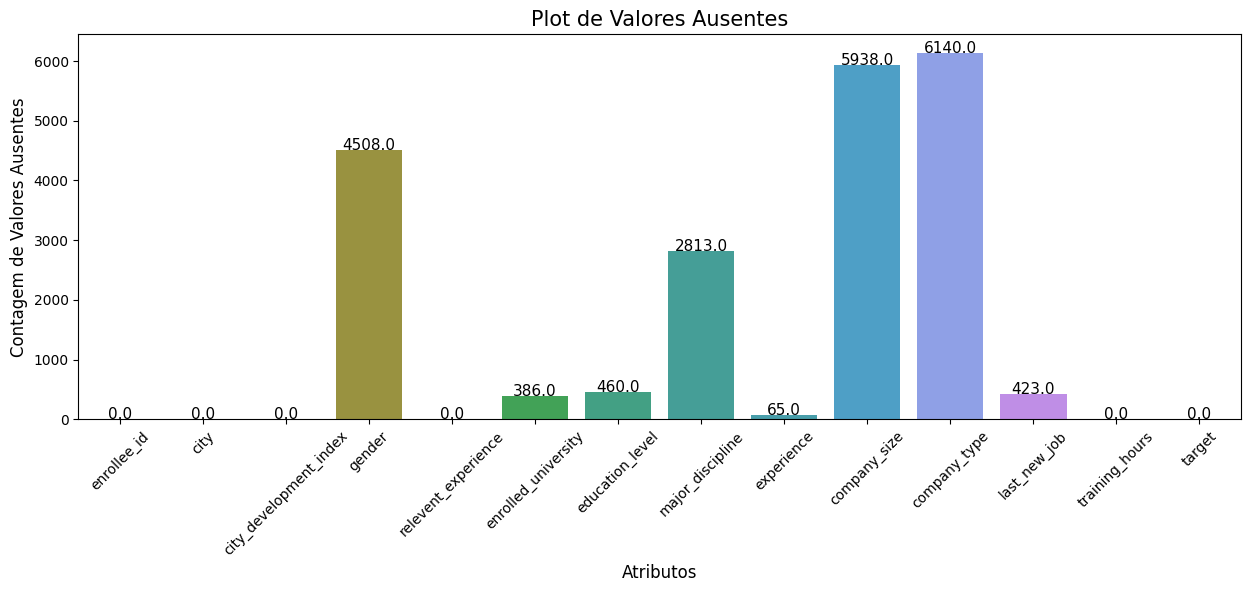

In [40]:


# Figura
plt.figure(figsize=(15, 5))

# Barplot
ax = sns.barplot(x='index', y=0, data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem de Valores Ausentes', fontsize=12)
plt.xticks(rotation=45)
plt.title("Plot de Valores Ausentes", fontsize=15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha='center', color='black', size=11)

plt.show()

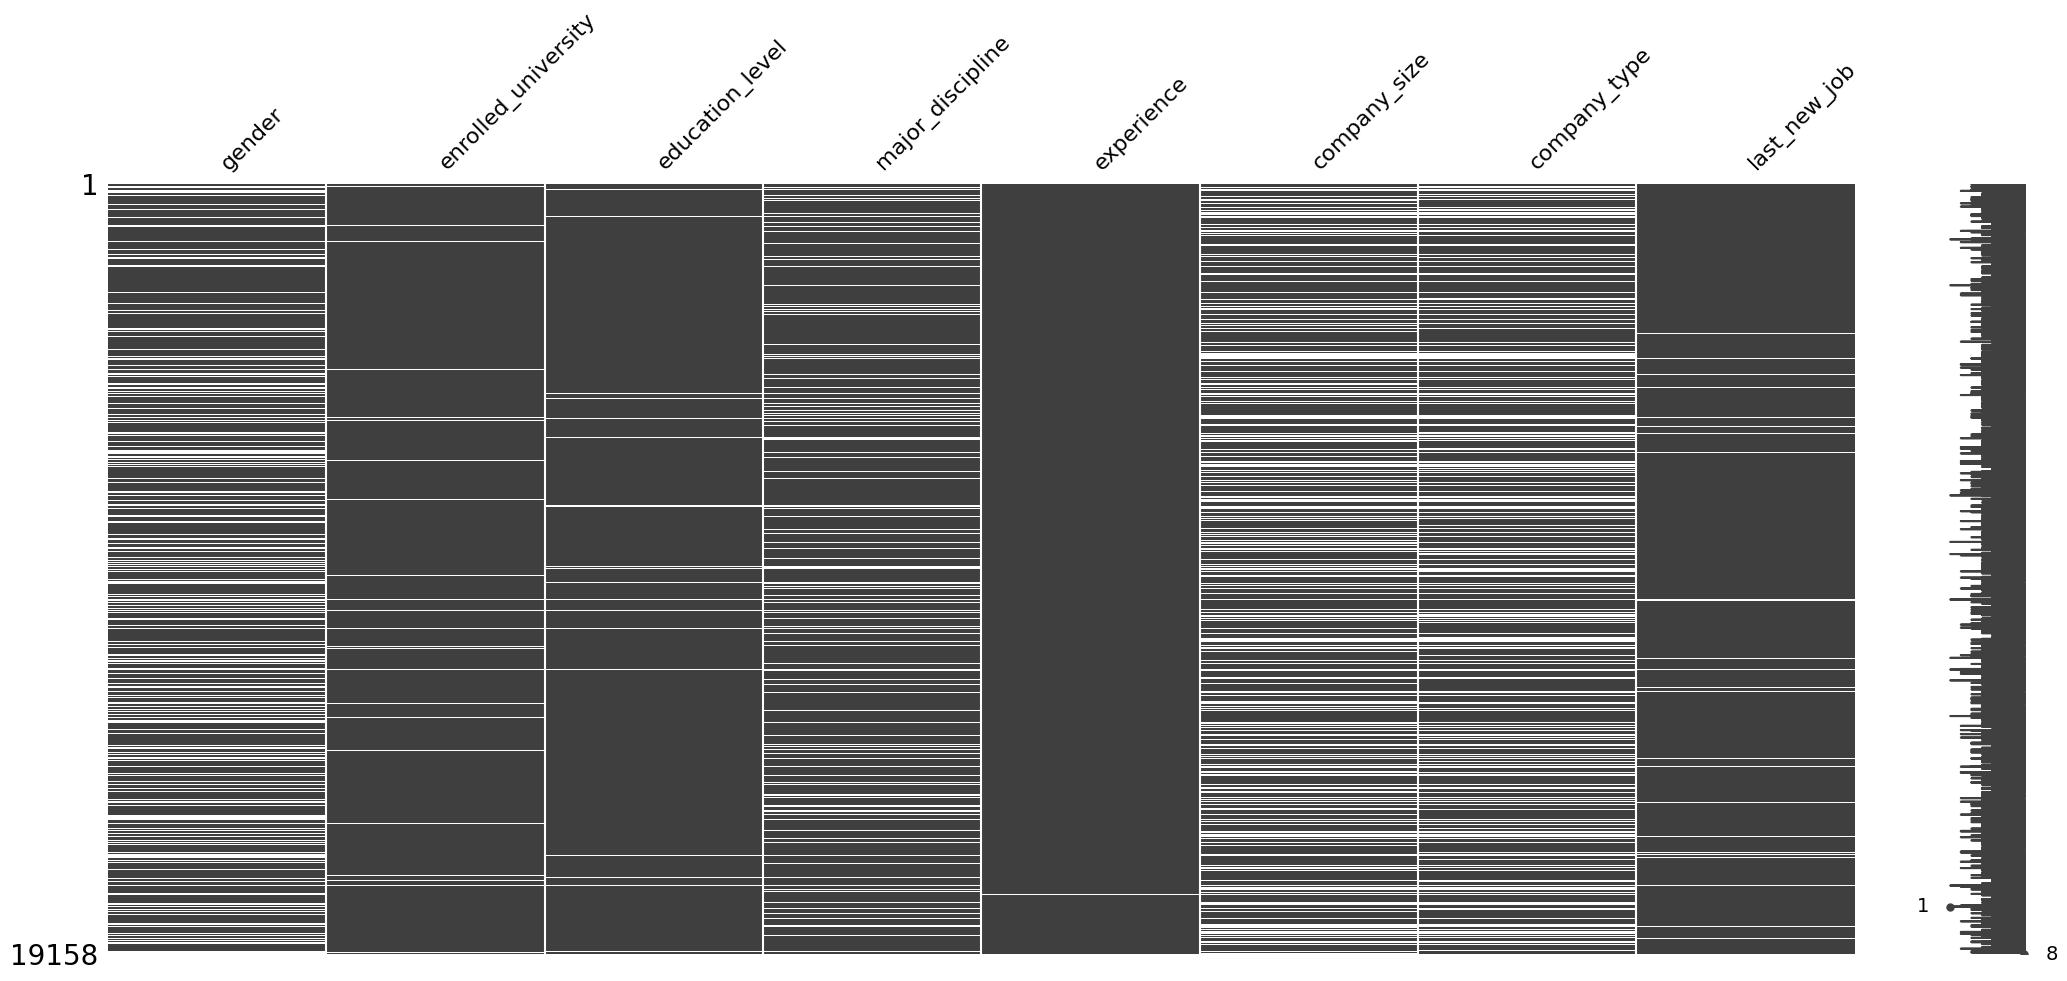

In [41]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes
if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

In [42]:
df['enrollee_id'].duplicated().sum()

0

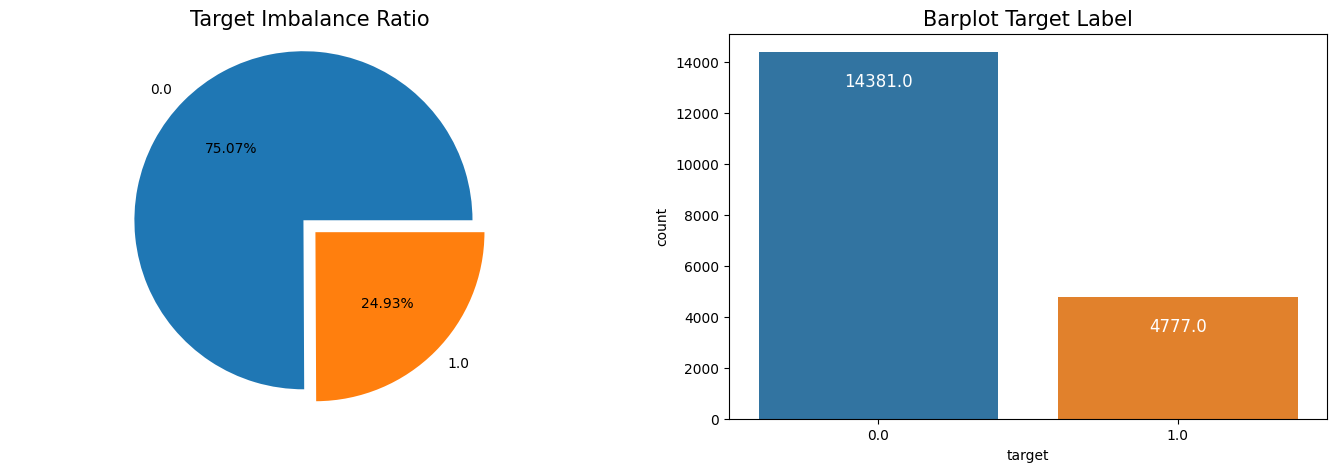

In [43]:
# Figura
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

Dados desbalanceados são aqueles em que a distribuição da classe alvo (target) é desproporcional, ou seja, uma classe tem um número significativamente maior de exemplos do que outra. Esse desequilíbrio pode levar a problemas na modelagem, pois o algoritmo de aprendizado pode ter dificuldade em aprender a classe minoritária, o que pode levar a uma baixa precisão e recall para essa classe. Além disso, métricas como a acurácia podem ser enganosas em conjuntos de dados desbalanceados, pois a simples previsão da classe majoritária pode levar a uma acurácia alta, mesmo que o modelo seja inútil para a classe minoritária.


### <font color="#FA7F08"> 5.1. Limpeza e Processamento dos Dados </font>
<hr color="#F5F5F5" size="1">

In [44]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')



### <font color="#FA7F08"> 5.2. Tratamento e processamento de valores ausente para a coluna <strong>'enrolled_university' </font>
<hr color="#F5F5F5" size="1">


In [45]:
count_enrolled_university = df['enrolled_university'].value_counts(dropna=False)

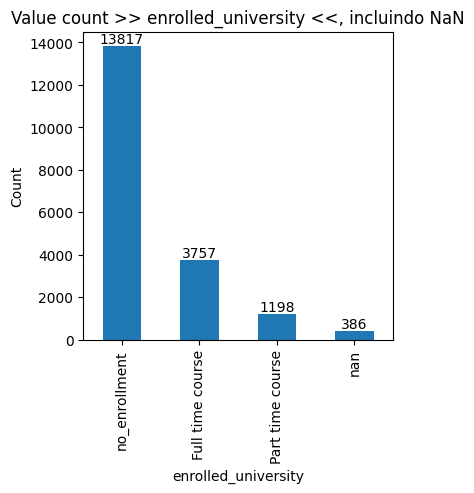

In [46]:
plt.figure(figsize=(4,4))
ax = count_enrolled_university.plot(kind='bar')

plt.title('Value count >> enrolled_university <<, incluindo NaN')
plt.xlabel('enrolled_university')
plt.ylabel('Count')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    


plt.show()

In [47]:
"""
criando uma lista de idx dos valores ausente contido na coluna 'enrolled_university'
ultiizamos esses indices para criar um filtro e aplicar a coluna 'education_level' para saber o seguinte:
Dentre os valores ausentes (NaN) contidos na coluna 'enrolled_university' como está distribuidos o nivel de educação do funcionarios...
"""
list_idx_nan_enrolled_university = df[df['enrolled_university'].isna()].index.tolist()
print(df.loc[list_idx_nan_enrolled_university, 'education_level'].value_counts(dropna=False))


Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64


<div class="alert alert-success"> 
    <strong><div style="color: rgb(0, 0, 0);"><strong>Informações:</strong></div></strong> <br>
     <div style="color: rgb(0, 0, 0);">→ ✔️ Sabendo que se no "education_level" o profissional tem apenas "High School" ou "Primary School" automaticamente ele não poderar está cursando nenhum curso de graduação, logo no campo 'enrolled_university' o valor devera ser "no_enrollment" ao inves de "NaN".</div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Sabendo que se no "education_level" o profissional tem "Phd" provavelmente não está escrito em um curso universitario também.</div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ O restante de valores ausente contido na 'enrolled_university' podemos classificar como 'Other'</div>

    
</div>


In [48]:
# Seleciona as linhas em que a coluna 'enrolled_university' é NaN e a coluna 'education_level' é 'Primary School' ou 'High School'
mask = df['education_level'].isin(['Primary School', 'High School','Phd'])
df.loc[mask, 'enrolled_university'] = 'no_enrollment'

#O restante de valores Nan podem ser tratados como Other
df['enrolled_university'] = df['enrolled_university'].fillna('Other')


In [49]:
print(df['enrolled_university'].value_counts(dropna=False))

no_enrollment       14990
Full time course     2835
Part time course     1009
Other                 324
Name: enrolled_university, dtype: int64


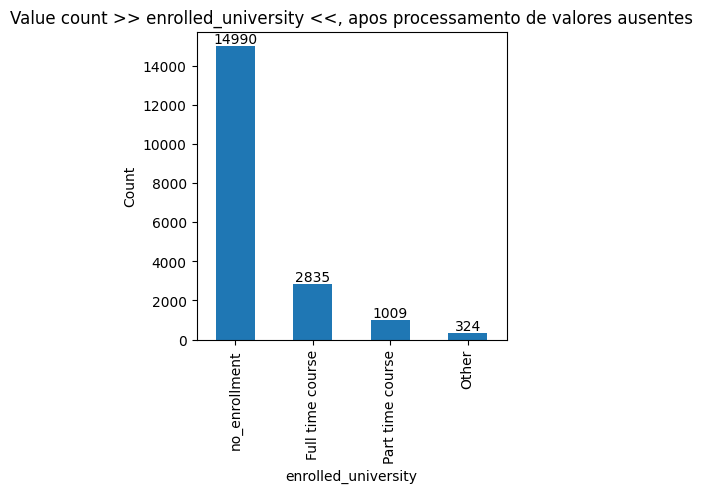

In [50]:
plt.figure(figsize=(4,4))
ax = (df['enrolled_university'].value_counts(dropna=False)).plot(kind='bar')

plt.title('Value count >> enrolled_university <<, apos processamento de valores ausentes')
plt.xlabel('enrolled_university')
plt.ylabel('Count')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

### <font color="#FA7F08"> 5.3. Tratamento e processamento de valores ausente para a coluna <strong>'education_level' </font>
<hr color="#F5F5F5" size="1"> 


In [51]:
print(df['education_level'].value_counts(dropna=False))



Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64


In [52]:
df['education_level'] = df['education_level'].fillna('Other')

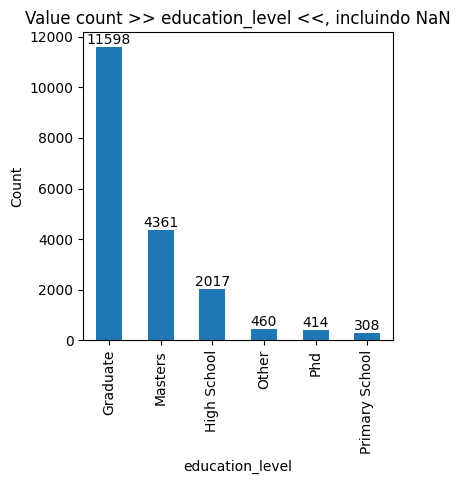

In [53]:
plt.figure(figsize=(4,4))
ax = (df['education_level'].value_counts(dropna=False)).plot(kind='bar')

plt.title('Value count >> education_level <<, incluindo NaN')
plt.xlabel('education_level')
plt.ylabel('Count')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()


### <font color="#FA7F08"> 5.4. Tratamento e processamento de valores ausente para a coluna <strong>'education_level' </font>
<hr color="#F5F5F5" size="1"> 

In [54]:
print(df['gender'].value_counts(dropna=False))
df['gender'] = df['gender'].fillna('Other')

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64


In [55]:
print(df['gender'].value_counts(dropna=False))

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64



### <font color="#FA7F08"> 5.5. Tratamento e processamento de valores ausente para a coluna 'major_discipline' </font>
<hr color="#F5F5F5" size="1"> 

In [56]:
print(df['major_discipline'].value_counts(dropna=False))
df['major_discipline'] = df['major_discipline'].fillna('Other')

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


In [57]:
print(df['major_discipline'].value_counts(dropna=False))

STEM               14492
Other               3194
Humanities           669
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


### <font color="#FA7F08"> 5.6. Tratamento e processamento de valores ausente para a coluna 'experience' </font>
<hr color="#F5F5F5" size="1"> 

In [58]:
print(df['experience'].value_counts(dropna=False))
df = df.dropna(subset=['experience'])

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
NaN       65
Name: experience, dtype: int64


In [59]:
print(df['experience'].value_counts(dropna=False))

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64


Como somente tem 65 valores ausentes podemos excluir as linhas cujo esses valores existem que não afetará nosso resultado. A parcela é minima. 



### <font color="#FA7F08"> 5.7. Tratamento e processamento de valores ausente para a coluna 'company_size' </font>
<hr color="#F5F5F5" size="1"> 

In [60]:
print(df['company_size'].value_counts(dropna=False))

NaN          5915
50-99        3078
100-500      2563
10000+       2011
10/49        1466
1000-4999    1323
<10          1304
500-999       874
5000-9999     559
Name: company_size, dtype: int64


In [61]:
df['company_size'] = df['company_size'].fillna('Other')
print(df['company_size'].value_counts(dropna=False))

Other        5915
50-99        3078
100-500      2563
10000+       2011
10/49        1466
1000-4999    1323
<10          1304
500-999       874
5000-9999     559
Name: company_size, dtype: int64


<ipython-input-61-ab75f751acc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_size'] = df['company_size'].fillna('Other')


### <font color="#FA7F08"> 5.8. Tratamento e processamento de valores ausente para a coluna 'company_type'</font>
<hr color="#F5F5F5" size="1"> 

In [62]:
print(df['company_type'].value_counts(dropna=False))

Pvt Ltd                9796
NaN                    6104
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Other                   121
Name: company_type, dtype: int64


In [63]:
df['company_type'] = df['company_type'].fillna('Other')
print(df['company_type'].value_counts(dropna=False))

Pvt Ltd                9796
Other                  6225
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Name: company_type, dtype: int64


<ipython-input-63-fbd78cb3e1b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_type'] = df['company_type'].fillna('Other')


### <font color="#FA7F08"> 5.9. Tratamento e processamento de valores ausente para a coluna 'last_new_job'</font>
<hr color="#F5F5F5" size="1"> 

In [64]:
print(df['last_new_job'].value_counts(dropna=False))

1        8019
>4       3283
2        2897
never    2444
4        1028
3        1023
NaN       399
Name: last_new_job, dtype: int64


In [65]:
df['last_new_job'] = df['last_new_job'].fillna('Other')
print(df['last_new_job'].value_counts(dropna=False))

1        8019
>4       3283
2        2897
never    2444
4        1028
3        1023
Other     399
Name: last_new_job, dtype: int64


<a id='reaferindo_analise'></a>
## <font color="#FA7F08"> 6. Verificando se a limpeza de dados alterou o dataset </font>
<hr color="#F5F5F5" size="1">

                     index  0
0              enrollee_id  0
1                     city  0
2   city_development_index  0
3                   gender  0
4      relevent_experience  0
5      enrolled_university  0
6          education_level  0
7         major_discipline  0
8               experience  0
9             company_size  0
10            company_type  0
11            last_new_job  0
12          training_hours  0
13                  target  0


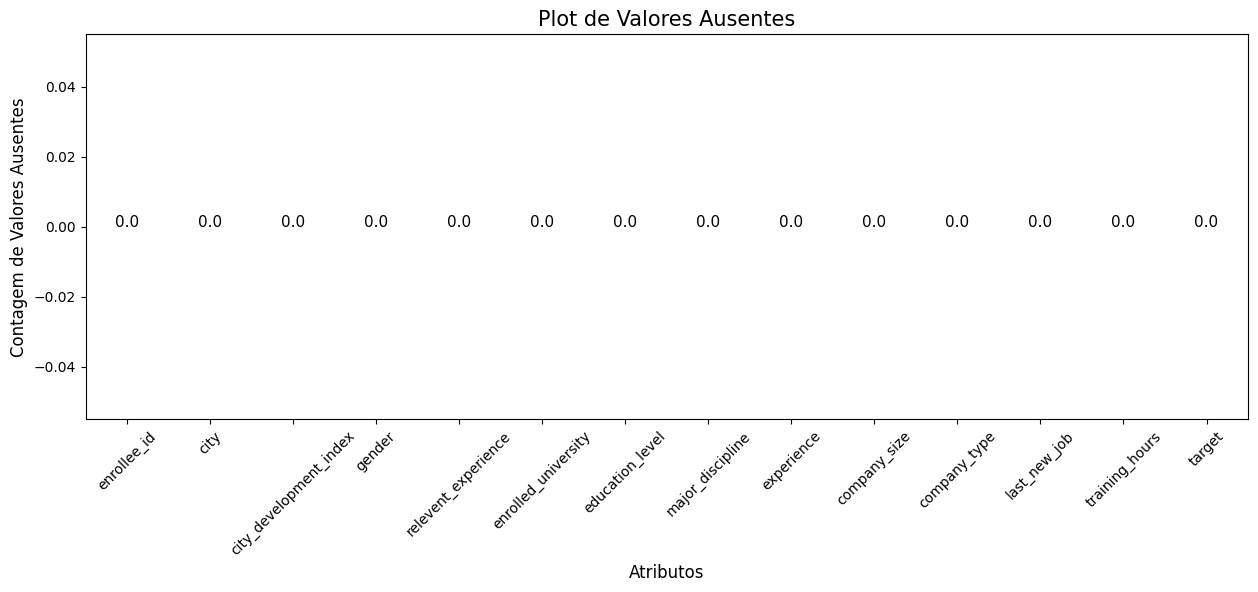

In [66]:
# Valores ausentes por coluna
new_null_df = df.isna().sum().reset_index()
print(new_null_df)

# Figura
plt.figure(figsize=(15, 5))

# Barplot
ax = sns.barplot(x='index', y=0, data=new_null_df, palette='husl')
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem de Valores Ausentes', fontsize=12)
plt.xticks(rotation=45)
plt.title("Plot de Valores Ausentes", fontsize=15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha='center', color='black', size=11)

plt.show()

In [67]:
df.drop("enrollee_id", axis = 1).corr("spearman")

<ipython-input-67-3220e3dad02e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop("enrollee_id", axis = 1).corr("spearman")


,city_development_index,experience,training_hours,target
city_development_index,1.000000,0.300997,0.007886,-0.278800
experience,0.300997,1.000000,0.003569,-0.183721
training_hours,0.007886,0.003569,1.000000,-0.014330
target,-0.278800,-0.183721,-0.014330,1.000000


<ipython-input-68-4ece96a41f23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")


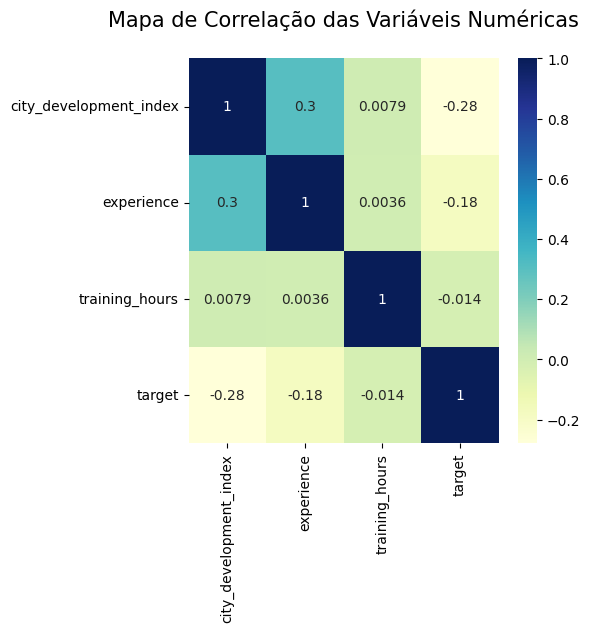

In [68]:
plt.figure(figsize = (5,5))
sns.heatmap(df.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [69]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target       0.0       1.0       woe        iv
gender                                        
Female  0.063533  0.068574  0.076351  0.030457
Male    0.711416  0.632730 -0.117214  0.030457
Other   0.225051  0.298696  0.283101  0.030457 
------------------------------------------------------------
target                      0.0       1.0       woe        iv
relevent_experience                                          
Has relevent experience  0.7534  0.619478 -0.195718  0.084303
No relevent experience   0.2466  0.380522  0.433775  0.084303 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.114443  0.247371  0.770810  0.134766
Other                0.014576  0.023349  0.471193  0.134766
Part time course     0.052165  0.054901  0.051114  0.134766
no_enrollment        0.818816  0.674379 -0.194066  0.134766 
--------------------------------

<Figure size 1000x1200 with 0 Axes>

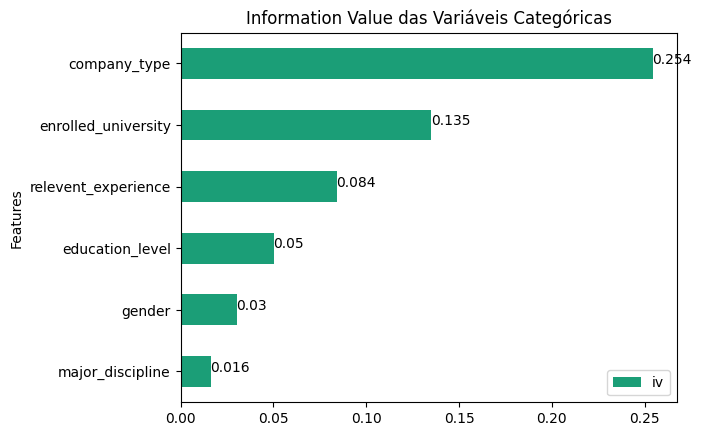

In [70]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Dark2")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

<a id='relatorio'></a>
## <font color="#FA7F08"> 7. Relatório</font>
<hr color="#F5F5F5" size="1">

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">📌 Relatório de Análise de Dados </div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> <h3><strong> Introdução: </strong></h3>
        <p>Nesta análise, foram usado dados referente a pesquisas de RH para tentar prever a intenção do funcionario permanecer ou procurar outros empregos após a contratação</p>  
    </div>
     <div style="color: rgb(0, 0, 0);"><h3> <strong> Metodologia:</strong></h3>
Para realização desta analise foram ultilizado as seguintes técnicas:
<ul>
    <strong>Limpeza de dados</strong>
    <li>Imputação de valores.</li>
    <li>Remoção de valores duplicados.</li>
    <li>Drop de registros desnecessarios.</li>
    <br>
        <strong>Análise de dados</strong>
    <li>Verificação da distribuição de dados.</li>
    <li>Verificação da correlação das variaveis númericas usando mapa de correlação.</li>
    <li>Verificação da correlação da variavel dependente com a independente usando WoE (Weight of Evidence) e IV (Information Value).  </li>
</ul>       
    </div>  
        <div style="color: rgb(0, 0, 0);"><h3> <strong> Resultados: </strong></h3>
             <ul>   
             <li> A coluna "city_development_index" apresenta uma correlação negativa moderada com a variável alvo "target", o que sugere que quanto menor o índice de desenvolvimento da cidade, maior é a probabilidade do candidato estar buscando uma mudança de emprego. </li> 
                 <li>A coluna "experience" também apresenta uma correlação negativa moderada com a variável alvo "target", o que sugere que quanto menor a experiência do candidato, maior é a probabilidade de ele estar buscando uma mudança de emprego.</li>
                 <li>A coluna "last_new_job" apresenta uma correlação negativa fraca com a variável alvo "target", o que sugere que quanto maior o tempo desde a última mudança de emprego, menor é a probabilidade do candidato estar buscando uma mudança de emprego.</li>
                  <li>As colunas "education_level" e "enrolled_university" não apresentam uma correlação forte com a variável alvo "target", o que sugere que a educação e o tipo de curso universitário matriculado não são fatores determinantes para a decisão de mudar de emprego.</li>
                  <li>Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.</li>
                  <li>A maioria dos candidatos não está matriculada em nenhum curso universitário atualmente (enrolled_university = "no_enrollment")</li>
                  <li>Os candidatos com experiência relevante (relevent_experience = "Has relevent experience") têm uma proporção maior de estar procurando emprego em comparação com aqueles sem experiência relevante.</li>
                  <li>A maioria dos candidatos possui um nível de educação de graduação (education_level = "Graduate"), seguido de pós-graduação (education_level = "Masters").</li>
                  <li>Os candidatos com nível de educação de ensino médio (education_level = "High School") têm uma proporção menor de estar procurando emprego em comparação com aqueles com níveis de educação mais altos.</li>
                 <li>Com base nessas informações, podemos inferir que os candidatos que estão atualmente matriculados em cursos universitários têm menos probabilidade de procurar emprego, enquanto aqueles sem experiência relevante têm maior probabilidade de estar procurando emprego. Além disso, candidatos com níveis de educação mais altos, como pós-graduação, têm maior probabilidade de estar procurando emprego em comparação com aqueles com níveis de educação mais baixos, como ensino médio.</li>
            </div>   
    <div style="color: rgb(0, 0, 0);"><h3><strong> Conclusão: </strong></h3>
        <p>Com base na análise que fizemos podemos concluir que as variaveis mais relevantes para identificar um bom candidato a permanecer na empresa são:</p>
        <p><strong>Obs:</strong> Os item listados abaixo estão classificados de mais relevantes para menos relevantes. As variaveis não listadas abaixo que também pertence ao dataset não são influente para o candidato permanecer ou não na empresa.</p>
        <ul>
            <li>Índice de desenvolvimento da cidade do candidato</li>
            <li>Tempo de experiência do candidato</li>
            <li>Estár ou não matriculado em curso universitário</li>
            <li>Nivel educacional</li>
            <li>A especialização do curso do candidado, quando esse tiver nivel superior</li>
        </ul>
        <strong>Recomendações</strong>
                 <ul> 
                 <li> O RH pode procurar candidatos que tenham como origem, cidades com índice de desenvolvimento mais baixo, sem possiveis experiências relevantes, menor experiência de trabalho e que tenha ensino superior. Assim terá maiores chances de encontrar candidatos que querem mudar de emprego e possivelmente maiores chances de boas contratações.</li>
                 <li>O RH pode melhorar o processo de captura de dados, afim de se obter melhores informações sobre seu negocio e futuramente obter melhores insight que afetam positivamente nos processos internos.</li>
                 <li>O RH pode mudar o tamanho dos cursos, para se obter melhores resultados com seus candidatos, não sendo necessario cursos extensos oque atualmente está causando desistencias ou desanimos, possivelmente por quebras de expectativas</li>                
    </div>
        
# FIM








